# HEX algorithm **Kopuru Vespa Velutina Competition**

**Linear Regression model**

Purpose: Predict the number of Nests in each of Biscay's 112 municipalities for the year 2020.

Output: *(WaspBusters_20210512_batch_OLSyears.csv)*

@authors:
* mario.bejar@student.ie.edu
* pedro.geirinhas@student.ie.edu
* a.berrizbeitia@student.ie.edu
* pcasaverde@student.ie.edu

## Libraries

In [91]:
# Base packages -----------------------------------
import numpy as np
import pandas as pd

# Visualization -----------------------------------
from matplotlib import pyplot

# Scaling data ------------------------------------
from sklearn import preprocessing

# Linear Regression -------------------------------
from statsmodels.formula.api import ols
#from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression


## Functions

In [92]:
# Function that checks if final Output is ready for submission or needs revision   

def check_data(HEX):

    if HEX.shape == (112, 3):
        print(HEX.shape,": Shape is correct.")
    else:
        print(HEX.shape,": Shape is **INCORRECT!**")

    if HEX["CODIGO MUNICIPIO"].nunique() == 112:
        print(HEX["CODIGO MUNICIPIO"].nunique(),": Number of unique municipalities is correct.")
    else:
        print(HEX["CODIGO MUNICIPIO"].nunique(),": Number of unique municipalities is **INCORRECT!**")
        
    if any(HEX["NIDOS 2020"] < 0):
        print("**INCORRECT!** At least one municipality has NESTS <= 0.")
    else:
        print("Great! All municipalities have NESTS >= 0.")
    
    print("The Total 2020 Nests' Prediction is", int(HEX["NIDOS 2020"].sum()))

## Get the data

In [93]:
QUEEN_train = pd.read_csv('../Feeder_years/WBds03_QUEENtrainYEARS.csv', sep=',')
QUEEN_predict = pd.read_csv('../Feeder_years/WBds03_QUEENpredictYEARS.csv', sep=',')

clusters = pd.read_csv("../Feeder_years/WBds_CLUSTERSnests.csv")

In [94]:
#QUEEN_predict.isnull().sum()

In [95]:
QUEEN_train.shape

(224, 32)

In [96]:
QUEEN_predict.shape

(112, 32)

## Caracterize in clusters

In [97]:
QUEEN_train = pd.merge(QUEEN_train, clusters, how = 'left', on = ['municip_code', 'municip_name'])
QUEEN_predict = pd.merge(QUEEN_predict, clusters, how = 'left', on = ['municip_code', 'municip_name'])

In [98]:
QUEEN_train.fillna(4, inplace=True)
QUEEN_predict.fillna(4, inplace=True)

In [99]:
QUEEN_train.shape

(224, 33)

In [100]:
QUEEN_predict.shape

(112, 33)

In [101]:
#QUEEN_predict.isnull().sum()

In [102]:
QUEEN_predict.Cluster.value_counts()

0.0    100
1.0     11
4.0      1
Name: Cluster, dtype: int64

## Determine feature importance

In [103]:
X = QUEEN_train.drop(columns = ['municip_name', 'municip_code', 'NESTS', 'station_code'])

In [104]:
y = QUEEN_train['NESTS']

In [105]:
# Scale the datasets using MinMaxScaler

scalators = X.columns
X[scalators] = preprocessing.minmax_scale(X[scalators])

In [106]:
# define the model
model_fi = LinearRegression()

# fit the model
model_fi.fit(X, y)

# get importance
importance = model_fi.coef_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0s, Score: %.5f' % (X.columns[i],v))

Feature: year_offset, Score: -19.07347
Feature: colonies_amount, Score: 0.12820
Feature: food_fruit, Score: 64.52064
Feature: food_apple, Score: -21.94419
Feature: food_txakoli, Score: 8.65933
Feature: food_kiwi, Score: -5.54634
Feature: food_pear, Score: -6.90230
Feature: food_blueberry, Score: 0.26595
Feature: food_raspberry, Score: -3.26215
Feature: freez, Score: 30.65547
Feature: hum, Score: -4.90894
Feature: lev_max, Score: -4.55651
Feature: lev_mid, Score: -3.44509
Feature: lev_min, Score: 15.24521
Feature: rain, Score: 32.89494
Feature: rain_1mm, Score: 3.54312
Feature: rain_cum, Score: 3.03212
Feature: rain_max_10, Score: -6.87395
Feature: rain_max_day, Score: 19.75738
Feature: sun, Score: 4.56326
Feature: temp_avg, Score: 32.98972
Feature: temp_max_abs, Score: 48.03232
Feature: temp_max_avg, Score: -44.58601
Feature: temp_min_abs, Score: 40.44143
Feature: wind_avg, Score: 6.68988
Feature: wind_max, Score: 28.04545
Feature: wind_max_avg, Score: 2.01495
Feature: population, Scor

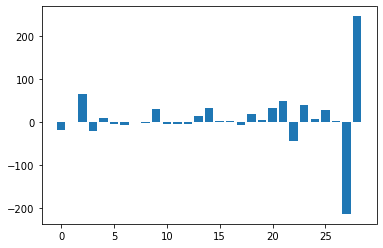

In [107]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [108]:
for i,v in enumerate(importance):
    if abs(v) > 15:
        print('Feature: %0s, Score: %.2f' % (X.columns[i],v))

Feature: year_offset, Score: -19.07
Feature: food_fruit, Score: 64.52
Feature: food_apple, Score: -21.94
Feature: freez, Score: 30.66
Feature: lev_min, Score: 15.25
Feature: rain, Score: 32.89
Feature: rain_max_day, Score: 19.76
Feature: temp_avg, Score: 32.99
Feature: temp_max_abs, Score: 48.03
Feature: temp_max_avg, Score: -44.59
Feature: temp_min_abs, Score: 40.44
Feature: wind_max, Score: 28.05
Feature: population, Score: -213.75
Feature: Cluster, Score: 246.26


## Train the model

### With the variables suggested by the Feature Importance method

In [109]:
model = ols('NESTS ~ year_offset + food_fruit + food_apple + freez + lev_min + rain + rain_max_day + temp_avg + temp_max_abs + temp_max_avg + temp_min_abs + wind_max + population + C(Cluster)',\
            data=QUEEN_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  NESTS   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     27.88
Date:                Mon, 31 May 2021   Prob (F-statistic):           1.07e-41
Time:                        14:17:22   Log-Likelihood:                -961.50
No. Observations:                 224   AIC:                             1955.
Df Residuals:                     208   BIC:                             2010.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5.177e+04   9792.15

### Backward elimination

In [110]:
model = ols('NESTS ~ year_offset + food_fruit + food_apple + rain + temp_avg + wind_max + population + C(Cluster)',\
            data=QUEEN_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  NESTS   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     45.92
Date:                Mon, 31 May 2021   Prob (F-statistic):           2.95e-45
Time:                        14:17:22   Log-Likelihood:                -964.51
No. Observations:                 224   AIC:                             1949.
Df Residuals:                     214   BIC:                             1983.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5.451e+04   9146.44

## Predict 2020's nests

In [111]:
y_2020 = model.predict(QUEEN_predict)
y_2020

0     -22.301534
1      47.382627
2     -21.636276
3     -30.016819
4      41.682387
         ...    
107   -19.598884
108   -30.639383
109   -13.427450
110   -17.339164
111   -27.153702
Length: 112, dtype: float64

In [112]:
# Any municipality resulting in NESTS<0 is equivalent to = 0

y_2020[y_2020 < 0] = 0
y_2020

0       0.000000
1      47.382627
2       0.000000
3       0.000000
4      41.682387
         ...    
107     0.000000
108     0.000000
109     0.000000
110     0.000000
111     0.000000
Length: 112, dtype: float64

In [113]:
QUEEN_predict['NESTS'] = y_2020

In [114]:
HEX = QUEEN_predict.loc[:,['municip_code','municip_name','NESTS']].groupby(by=['municip_code','municip_name'], as_index=False).sum()

In [115]:
y_2020.sum()

589.6584674305777

## Manual adjustments

In [116]:
HEX.loc[HEX.municip_code.isin([48022, 48071, 48088, 48074, 48051, 48020]), :]

,municip_code,municip_name,NESTS
19,48020,Bilbao,0.0
21,48022,Karrantza Harana/Valle de Carranza,0.0
50,48051,Lanestosa,0.0
70,48071,Muskiz,0.0
73,48074,Urduña/Orduña,0.0
87,48088,Ubide,0.0


In [62]:
# the following two steps are unnecessary, as the municipalities in question are already zero

#HEX.loc[HEX.municip_code.isin([48022, 48071, 48088, 48074, 48051, 48020]), 'NESTS'] = 0

In [63]:
#HEX.loc[HEX.municip_code.isin([48022, 48071, 48088, 48074, 48051, 48020]), :]

,municip_code,municip_name,NESTS
19,48020,Bilbao,0.0
21,48022,Karrantza Harana/Valle de Carranza,0.0
50,48051,Lanestosa,0.0
70,48071,Muskiz,0.0
73,48074,Urduña/Orduña,0.0
87,48088,Ubide,0.0


In [117]:
HEX.columns = ["CODIGO MUNICIPIO", "NOMBRE MUNICIPIO", "NIDOS 2020"] # change column names to Spanish (Competition template)

## Verify dataset format

In [118]:
check_data(HEX)

(112, 3) : Shape is correct.
112 : Number of unique municipalities is correct.
Great! All municipalities have NESTS >= 0.
The Total 2020 Nests' Prediction is 589


## Export dataset for submission

In [120]:
HEX.to_csv('WaspBusters_20210526_OLSyearsMarioClusters.csv', index=False)